Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!



To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

The aim of this project is:




-create an sk_pipeline for preprocessing and classification of the data


-apply a dense neural netwrok to classify the data and compare the models used based on accuracy

In [1]:
#import the necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer


%matplotlib inline
sns.set_style('darkgrid')

import warnings

warnings.filterwarnings('ignore')

In [2]:
#load teh datase
data = pd.read_csv('spaceship-titanic/train.csv')
data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
#check for missing values
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
#some of the collumns are not important for use in the model such as passangerid and name
data.drop(['PassengerId','Name' ],axis=1,inplace=True)
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [7]:
#We can split the cabin collumn into individual column for deck/num/side
data[['Deck','num','side']] = data['Cabin'].str.split('/',expand=True)
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,num,side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [8]:
data['num'] = data['num'].astype('float64')


In [9]:
#drop the cabin column and ensure the columns are in correct formats
data.drop('Cabin',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8494 non-null   object 
 12  num           8494 non-null   float64
 13  side          8494 non-null   object 
dtypes: bool(1), float64(7), object(6)
memory usage: 891.5+ KB


In [10]:
#convert the data typesto either float or object
data['Transported'] = data['Transported'].apply(lambda x:str(x))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   object 
 11  Deck          8494 non-null   object 
 12  num           8494 non-null   float64
 13  side          8494 non-null   object 
dtypes: float64(7), object(7)
memory usage: 950.9+ KB


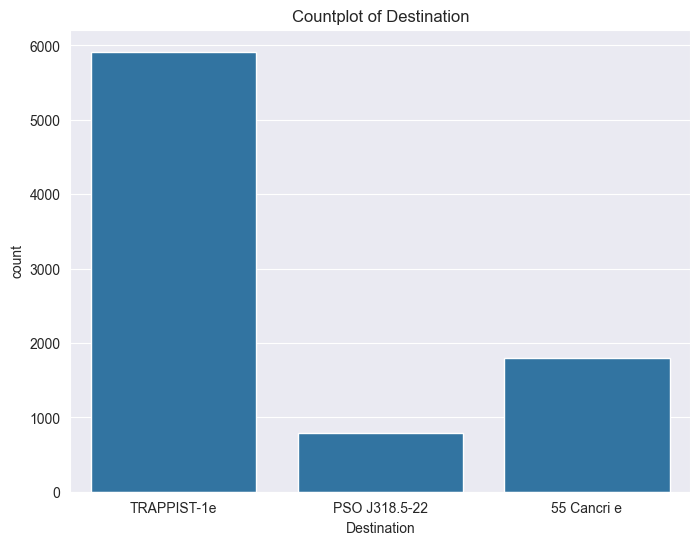

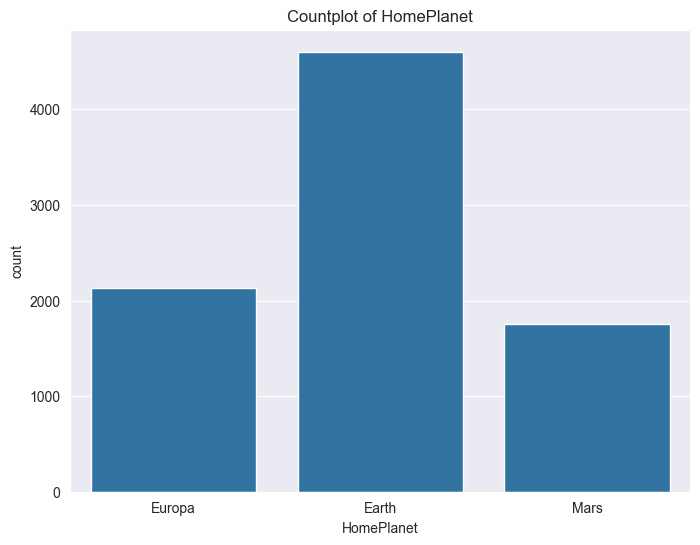

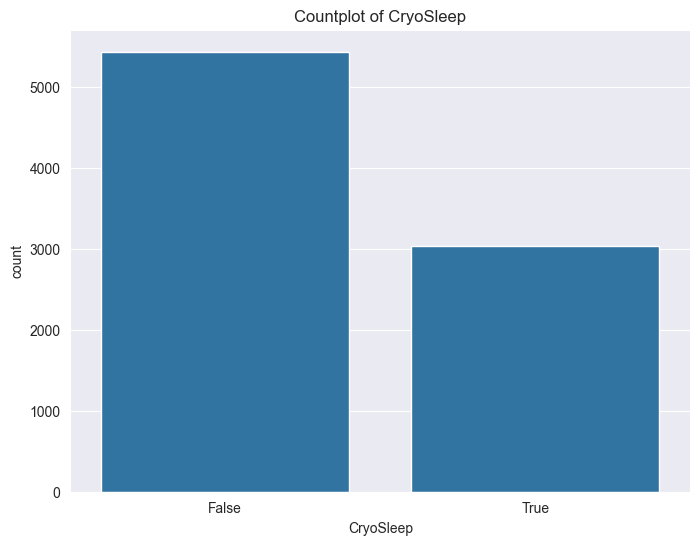

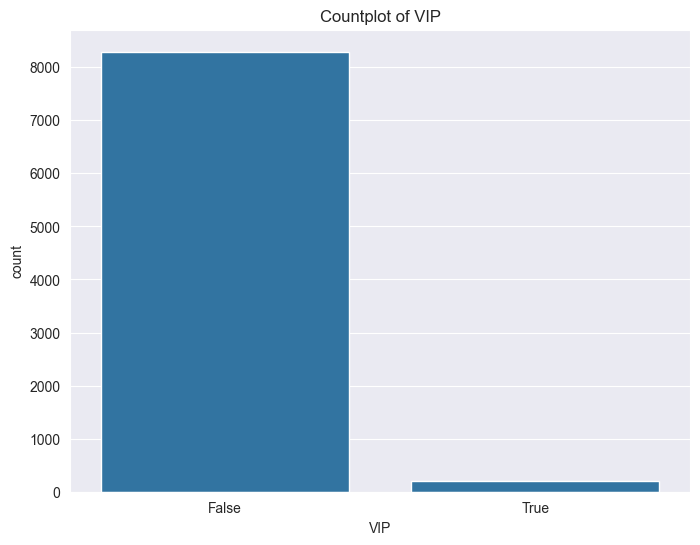

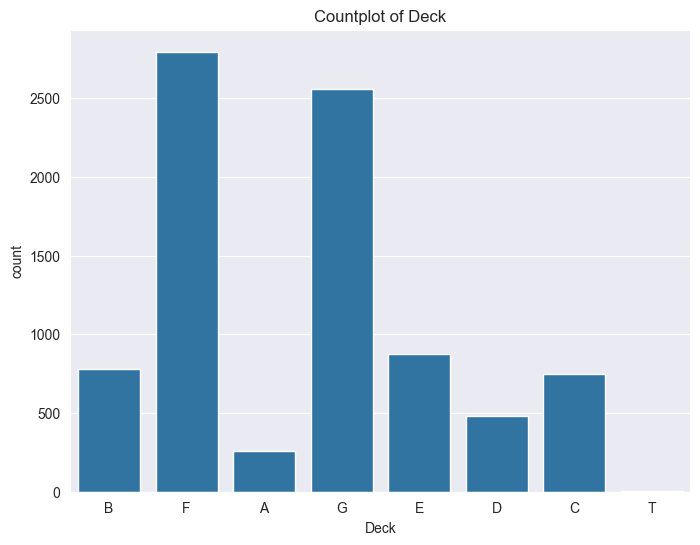

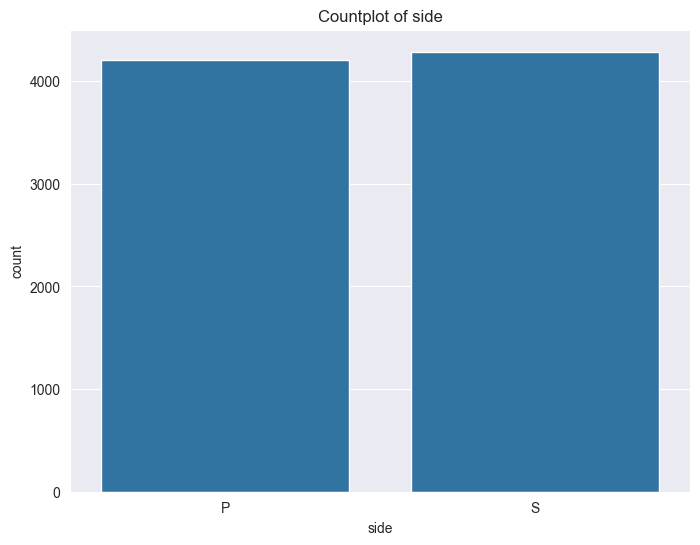

In [11]:
#do some dea to better understand the data
for col in ['Destination','HomePlanet','CryoSleep','VIP','Deck','side']:
    plt.figure(figsize=(8, 6))
    if data[col].dtype == object:
        sns.countplot(x=data[col])
        plt.title(f'Countplot of {col}')
    plt.show()



Building the pipeline

In [12]:
data.head(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True,F,0.0,P
6,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True,F,2.0,S
7,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,True,G,0.0,S
8,Earth,False,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True,F,3.0,S
9,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True,B,1.0,P


In [13]:
#split the data into training and testing data

data.info()

features = data.drop('Transported',axis=1)
label = data['Transported']

cat_cols = [col for col in features.columns if features[col].dtype == 'object']
num_cols = [col for col in features.columns if features[col].dtype != 'object']
print(cat_cols,num_cols)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   object 
 11  Deck          8494 non-null   object 
 12  num           8494 non-null   float64
 13  side          8494 non-null   object 
dtypes: float64(7), object(7)
memory usage: 950.9+ KB
['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'side'] ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'num']


In [14]:
for col in features.columns:
    features[col] = LabelEncoder().fit_transform(features[col])

features.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,num,side
0,1,0,2,39,0,0,0,0,0,0,1,0,0
1,0,0,2,24,0,109,9,25,456,44,5,0,1
2,1,0,2,58,1,43,1206,0,1273,49,0,0,1
3,1,0,2,33,0,0,806,332,1132,187,0,0,1
4,0,0,2,16,0,277,69,149,470,2,5,1,1


In [15]:
x_train,x_test,y_train,y_test = train_test_split(features,label,train_size=0.7,random_state=42)

for _ in x_train,x_test,y_train,y_test:
    print(f'{_.shape}')



(6085, 13)
(2608, 13)
(6085,)
(2608,)


In [16]:

num_pip = Pipeline([
    ('Num_imputation',SimpleImputer(strategy='mean')),
    ('Scaling',MinMaxScaler()),
    ('Decomposition',PCA())
])



In [17]:
#find the best classifier model to use
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SVC':SVC(),
    'GradientBoostingClassifier':GradientBoostingClassifier()
}

for name,model in models.items():
    pipeline = Pipeline(steps=[
        ('Numerical pipeline',num_pip),
        ('classifier',model)
    ])

    #fit the model
    pipeline.fit(x_train,y_train)

    prediction = pipeline.predict(x_test)

    accuracy  = metrics.accuracy_score(y_test,prediction)

    print(f'{name} has an accuracy of {accuracy}')





LogisticRegression has an accuracy of 0.7427147239263804
DecisionTreeClassifier has an accuracy of 0.7319785276073619
AdaBoostClassifier has an accuracy of 0.758819018404908
RandomForestClassifier has an accuracy of 0.7887269938650306
SVC has an accuracy of 0.781441717791411
GradientBoostingClassifier has an accuracy of 0.7741564417177914


RANDOM FOREST IS HENCE THE BEST MODEL



Perfom hyper_parameter tuning to find the best parameters

In [18]:
from sklearn.model_selection import RandomizedSearchCV
param = {
    'n_estimators':[100,150,200,300,250,350],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[1,3,5,10,15,20,25,30],
    'random_state':[0,1,42],
    'max_leaf_nodes':[1,2,3,4,5,10,20],
    'max_features':[10,20,30,15,25,35,45,40,50]
}
    
    

search = RandomizedSearchCV(RandomForestClassifier(),param,scoring='accuracy',random_state=42,cv=5)

search.fit(x_train,y_train)
prediction = search.predict(x_test)

print(search.best_params_)

print(f'classification report : {metrics.classification_report(y_test,prediction)}')

{'random_state': 0, 'n_estimators': 250, 'max_leaf_nodes': 20, 'max_features': 25, 'max_depth': 5, 'criterion': 'entropy'}
classification report :               precision    recall  f1-score   support

       False       0.83      0.69      0.75      1289
        True       0.74      0.86      0.79      1319

    accuracy                           0.77      2608
   macro avg       0.78      0.77      0.77      2608
weighted avg       0.78      0.77      0.77      2608



In [19]:
model = RandomForestClassifier(random_state= 0, n_estimators= 250, max_leaf_nodes= 20, max_features= 25, max_depth= 5, criterion= 'entropy',verbose=True)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

print(metrics.classification_report(y_test,prediction))




[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    5.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

       False       0.83      0.69      0.75      1289
        True       0.74      0.86      0.79      1319

    accuracy                           0.77      2608
   macro avg       0.78      0.77      0.77      2608
weighted avg       0.78      0.77      0.77      2608



Now lets try and use dense neural networks


For us to use the neuralnet classifier we neeed to akesure the input is in matrix format instead of pandas df

In [44]:
data = pd.read_csv('spaceship-titanic/train.csv')

features = data.drop(['Transported','Name','PassengerId'],axis=1)
labels  = data['Transported']

features.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [45]:
features[['Deck','num','side']] = features['Cabin'].str.split('/',expand=True)
features.drop('Cabin',axis=1,inplace=True)

features.head(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S
5,Earth,False,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,F,0,P
6,Earth,False,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,F,2,S
7,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,G,0,S
8,Earth,False,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,F,3,S
9,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,B,1,P


In [46]:
features.shape
labels

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [47]:
#Handling the missing values
cat_cols = [col for col in features.columns if features[col].dtype == 'object']
num_cols = [col for col in features.columns if features[col].dtype != 'object']

print(cat_cols,num_cols)


for col in cat_cols:
    features[col].fillna(features[col].mode()[0],inplace=True)

for col in num_cols:
    features[col].fillna(features[col].mean(),inplace=True)

features.isnull().sum()

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'num', 'side'] ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
num             0
side            0
dtype: int64

In [48]:
for col in cat_cols:
    features[col] = LabelEncoder().fit_transform(features[col])

labels = LabelEncoder().fit_transform(labels)

features.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,num,side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1,1


In [50]:
#scale the values
features = MinMaxScaler().fit_transform(features)

x_train,x_test,y_train,y_test = train_test_split(features,labels,random_state=20,test_size=0.3)

for _ in x_train,x_test,y_train,y_test:
    print(_.shape)

(6085, 13)
(2608, 13)
(6085,)
(2608,)


In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [68]:
model = Sequential([
    Dense(128,activation='relu',input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

model.compile(metrics=['accuracy'],loss='binary_crossentropy',optimizer='adam')
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6548 - loss: 0.6287 - val_accuracy: 0.7324 - val_loss: 0.5302
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7350 - loss: 0.5311 - val_accuracy: 0.7627 - val_loss: 0.4864
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7554 - loss: 0.4989 - val_accuracy: 0.7841 - val_loss: 0.4583
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7624 - loss: 0.4825 - val_accuracy: 0.7845 - val_loss: 0.4462
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7758 - loss: 0.4822 - val_accuracy: 0.7826 - val_loss: 0.4433
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7701 - loss: 0.4667 - val_accuracy: 0.7807 - val_loss: 0.4474
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7795 - loss: 0.4590 - val_accuracy: 0.7956 - val_loss: 0.4322
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7937 - loss: 0.4400 - val_accuracy:

In [70]:
loss,accuracy = model.evaluate(x_test,y_test)

print(f'model accuracy: {accuracy* 100:.2f}%')

82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8034 - loss: 0.4067
model accuracy: 80.44%
